In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Funciones

In [47]:
from sklearn.metrics import confusion_matrix


def plot(y_val, y_pred):
    labels = unique_labels(y_train)
    column = [f'Predicccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')


In [48]:
from sklearn.metrics import accuracy_score, classification_report

def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def pfq(y_true, y_pred, calidades):
    conf_matrix = confusion_matrix(y_true, y_pred)
    for calidad in calidades:
        indice = calidad - min(calidades)  # Índice en la matriz de confusión
        tp = conf_matrix[indice, indice]  # Verdaderos positivos para la calidad en particular
        fp = conf_matrix[:, indice].sum() - tp  # Falsos positivos
        fn = conf_matrix[indice, :].sum() - tp  # Falsos negativos
        precision = tp / (tp + fp + 1e-12)  # Calcular precisión
        print(f'Precisión para calidad {calidad}: {precision:.4f}')

In [50]:
datos=pd.read_csv("wheat.csv")

In [51]:
datos

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


<Axes: title={'center': 'datos'}, xlabel='category'>

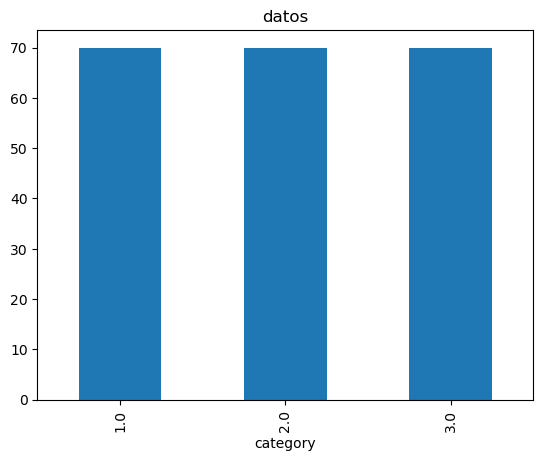

In [52]:
datos["category"].value_counts().plot(kind='bar', title='datos')

# ELIMINAR LINEAL DEPENDIENTES

<Axes: >

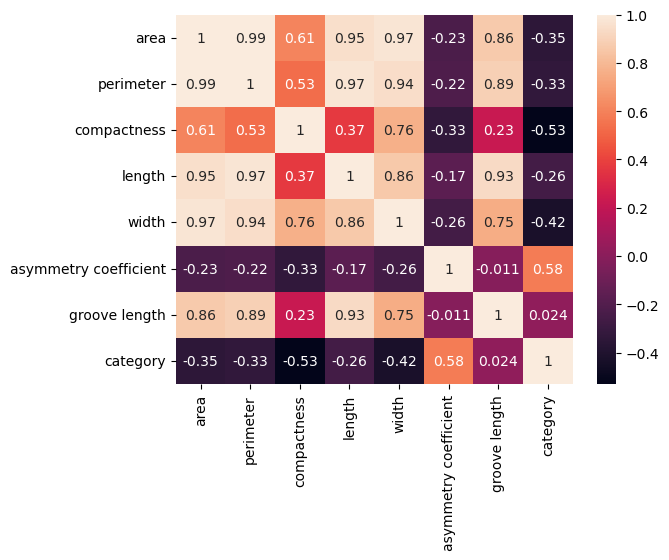

In [53]:
import seaborn as sns
sns.heatmap(datos.corr(),annot=True)

In [54]:
eliminar=['area','length','width']

In [55]:
datos=datos.drop(eliminar,axis=1)

In [56]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


<Axes: >

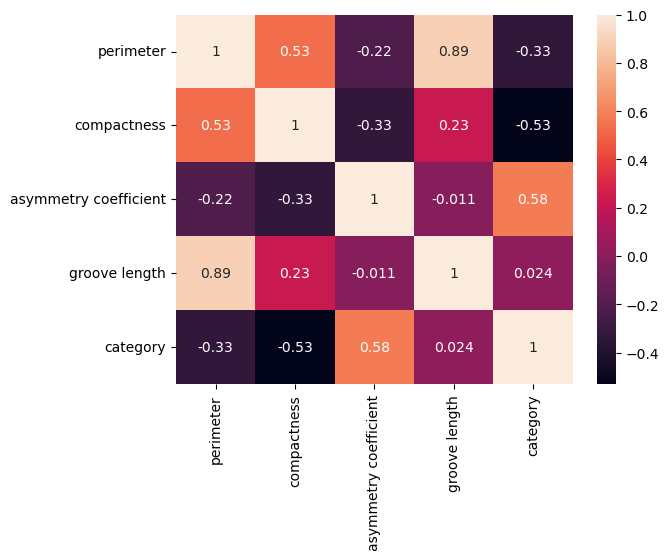

In [57]:
sns.heatmap(datos.corr(),annot=True)

c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


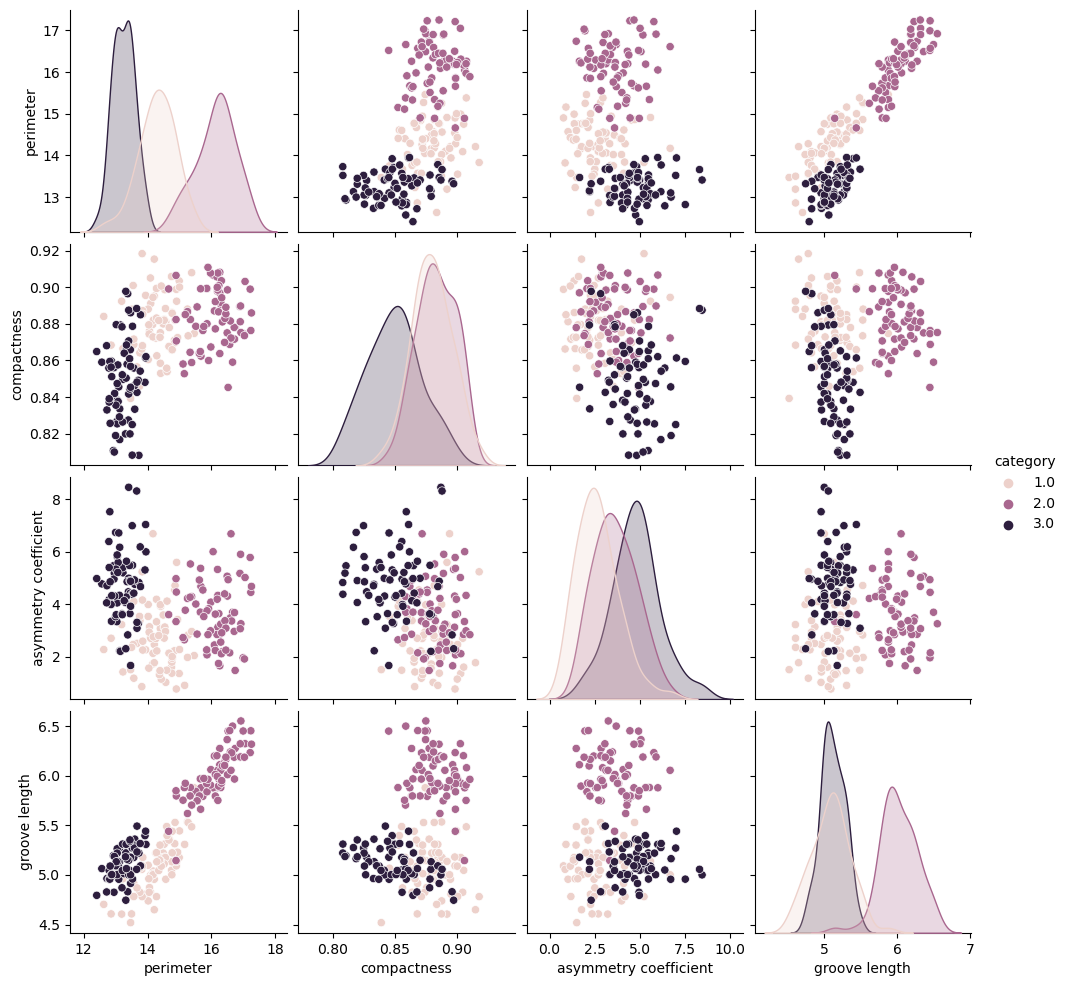

In [58]:
sns.pairplot(datos,hue='category')

# NORMALIZACION(PENDIENTE)

In [59]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


In [60]:
from sklearn.preprocessing import normalize

normalized_data = normalize(datos, axis=0)
datosN = pd.DataFrame(normalized_data, columns=datos.columns)

X = datosN.drop("category", axis = 1)
Y = datos['category']

In [61]:
X

,perimeter,compactness,asymmetry coefficient,groove length
0,0.070057,0.068981,0.038386,0.066335
1,0.068782,0.069781,0.017594,0.062980
2,0.066516,0.071674,0.046648,0.061315
3,0.065808,0.070922,0.039043,0.061061
4,0.070765,0.071547,0.023419,0.065763
...,...,...,...,...
205,0.062315,0.069560,0.062756,0.061887
206,0.060804,0.067405,0.074750,0.063577
207,0.064487,0.070352,0.143711,0.064251
208,0.062362,0.067485,0.062185,0.064098


### DIVISION DATOS 80/20

In [62]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.3, random_state=42)

# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier
r_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_val)

### MATRIZ CONFUSION 1

<Axes: >

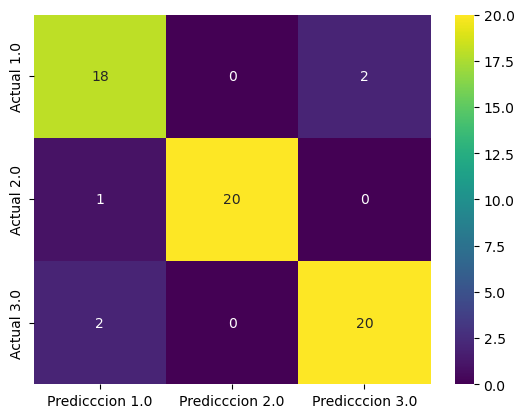

In [64]:
plot(y_val,y_pred)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred)
calidades = [1,2,3]
for calidad in calidades:
    indice = calidad-1  
    # Verdaderos positivos para la calidad en particular
    tp = conf_matrix[indice, indice]
    # Falsos positivos
    fp = conf_matrix[:, indice].sum() - tp
    # Falsos negativos
    fn = conf_matrix[indice, :].sum() - tp
    # Calcular precisión
    precision = tp / (tp + fp + 1e-12)
    print(f'Precisión para clase {calidad}: {precision:.4f}')

Precisión para clase 1: 0.8571
Precisión para clase 2: 1.0000
Precisión para clase 3: 0.9091


In [66]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9206349206349206
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.86      0.90      0.88        20
         2.0       1.00      0.95      0.98        21
         3.0       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



# K-MEANS

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)


<Axes: >

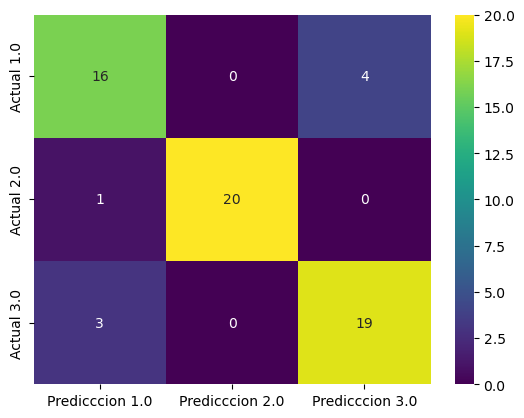

In [68]:
plot(y_val,y_pred2)

In [69]:
accuracy = accuracy_score(y_val, y_pred2)
classification_rep = classification_report(y_val, y_pred2, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.873015873015873
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.80      0.80      0.80        20
         2.0       1.00      0.95      0.98        21
         3.0       0.83      0.86      0.84        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



In [70]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# Arboles de decision

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

<Axes: >

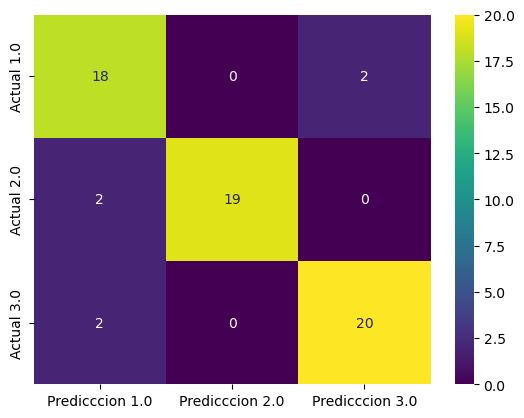

In [72]:
plot(y_val,y_pred3)

In [73]:
resultadosModelo(y_val, y_pred3)

Precisión: 0.9047619047619048
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.82      0.90      0.86        20
         2.0       1.00      0.90      0.95        21
         3.0       0.91      0.91      0.91        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.91      0.90      0.91        63



In [74]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# SVM

In [75]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=0.01)
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

<Axes: >

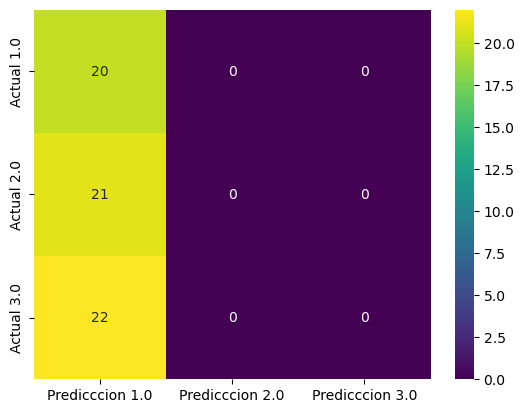

In [76]:
plot(y_val,y_pred4)

In [77]:
resultadosModelo(y_val, y_pred4)

Precisión: 0.31746031746031744
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.32      1.00      0.48        20
         2.0       1.00      0.00      0.00        21
         3.0       1.00      0.00      0.00        22

    accuracy                           0.32        63
   macro avg       0.77      0.33      0.16        63
weighted avg       0.78      0.32      0.15        63



In [78]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# MLP

In [79]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10000)
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_val)

<Axes: >

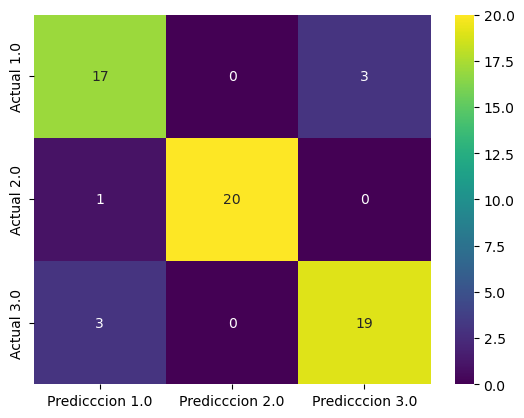

In [80]:
plot(y_val,y_pred5)

In [81]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.8888888888888888
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.81      0.85      0.83        20
         2.0       1.00      0.95      0.98        21
         3.0       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



In [82]:
pfq(y_val, y_pred, [1, 2, 3])

Precisión para calidad 1: 0.8571
Precisión para calidad 2: 1.0000
Precisión para calidad 3: 0.9091


# TENSOR

In [83]:
y_train_array = y_train.values
y_val_array = y_val.values
# Ensure the values are integers, as to_categorical expects integers
y_train_array = y_train_array.astype(int)
y_val_array = y_val_array.astype(int)
# Subtract 1 from y_train_array because to_categorical assumes that the classes start from 0
y_train_array = y_train_array - 1
y_val_array = y_val_array - 1
# Convert to one-hot encoding
y_train2 = keras.utils.to_categorical(y_train_array, num_classes=3)
y_val2 = keras.utils.to_categorical(y_val_array, num_classes=3)

In [88]:
from tensorflow import keras

model = tf.keras.models.Sequential([
  
  keras.layers.Dense(100, activation='relu', input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(50, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(25, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
history = model.fit(X_train, y_train2, batch_size=16, epochs=1000, verbose=3, 
                    shuffle=True, validation_data=(X_val, y_val2))
print(history.history.keys())

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E